# Section 1

## Imports packages

In [164]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg import svd
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.spatial import distance_matrix
import scipy
import glob
import cv2
from sklearn.manifold import TSNE
import os
import umap

C:\Users\HP\anaconda3\envs\unsupervised_hw\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [100]:


X = np.array([[1,2],[2,1],[1,0]]).T
X = X - np.mean(X, axis=1, keepdims=True)
#print(X)
pca = PCA(n_components=2)
pca.fit(X.T)
X_pca = pca.transform(X.T)
print(pca.components_)
#print(pca.explained_variance_)


u, s, vh = svd(X, full_matrices=True) #the u's columns are the eigenvector of X(X.T) and the v's columns are the eigenvector of (X.T)X 
print(u)

w,v = np.linalg.eig(X@(X.T))
print(v)

[[0. 1.]
 [1. 0.]]
[[ 2.4870694e-16  1.0000000e+00]
 [ 1.0000000e+00 -2.4870694e-16]]
[[1. 0.]
 [0. 1.]]


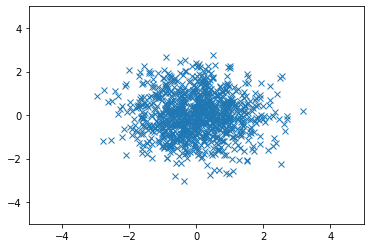

In [101]:

np.random.seed(0)#create data in 2D. The data is not centered
mean = [0, 0]
cov = [[1, 0], [0, 1]]
num_samples = 1000
X = np.random.multivariate_normal(mean, cov, num_samples).T #shape=[2, num_samples]
X = X - np.mean(X, axis=1, keepdims=True)
x, y = X
plt.plot(x, y, 'x')
#plt.axis('equal')
plt.xlim(mean[0] - 5, mean[0] + 5)
plt.ylim(mean[0] - 5, mean[0] + 5)
plt.show()

[[ 0.51237892 -0.85875948]
 [ 0.85875948  0.51237892]]
The pca components are: 1 - [ 0.51237892 -0.85875948], 2 - [0.85875948 0.51237892]
[[-0.51237892  0.85875948]
 [ 0.85875948  0.51237892]]
The svd components are: 1 - [ 0.51237892 -0.85875948], 2 - [0.85875948 0.51237892]


(-5.0, 5.0)

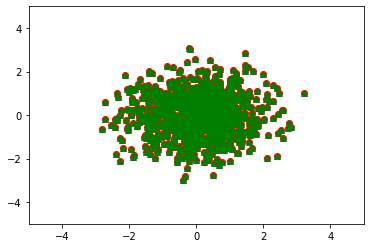

In [104]:


#PCA
pca = PCA(n_components=2)
pca.fit(X.T)
X_pca = pca.transform(X.T) #fit requires input with shape (num_sample, num_features)
print(pca.components_)
print(f"The pca components are: 1 - {pca.components_[0]}, 2 - {pca.components_[1]}")
#plt.plot(x, y, 'x')
plt.plot(X_pca[:, 0], X_pca[:, 1], 'ro')



#SVD
u, s, vh = svd(X, full_matrices=True) #the u's columns are the eigenvector of X(X.T) and the v's columns are the eigenvector of (X.T)X 
print(u)
#indx_sort = np.argsort(s)
#print(indx_sort)
#u_sort = u[:, indx_sort]

u[:,0] = -u[:,0] #just for the visualization
print(f"The svd components are: 1 - {u[:, 0]}, 2 - {u[:, 1]}")
X_svd = X.T @ u #project onto the "low" space
plt.plot(X_svd[:, 0], X_svd[:, 1], 'g^')

#configuration plot
plt.xlim(mean[0] - 5, mean[0] + 5)
plt.ylim(mean[0] - 5, mean[0] + 5)

As we can see when the data is not centered, these two methods(SVD and PCA) don't yield the same result

# Section 2 + 3

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 12s 1us/step


(10000, 28, 28)

In [58]:
num_samples = 1000
indices_1=np.where(y_train==1)[0]
indices_0=np.where(y_train==0)[0]
x_train_0 = x_train[indices_0][:num_samples]
y_train_0 = y_train[indices_0][:num_samples]

x_train_1 = x_train[indices_1][:num_samples]
y_train_1 = y_train[indices_1][:num_samples]

_, w, h = x_train_0.shape
#reshape the data for adjusting the input to the PCA module
x_train_0 = x_train_0.reshape(-1, w*h)
x_train_1 = x_train_1.reshape(-1, w*h)

print(x_train_0.shape)
combined_dataset = np.concatenate([x_train_0, x_train_1], axis=0)
y_combined_dataset = np.concatenate([y_train_0, y_train_1])
my_dataset = {0: x_train_0, 1: x_train_1, "0_and_1": combined_dataset}






(1000, 784)


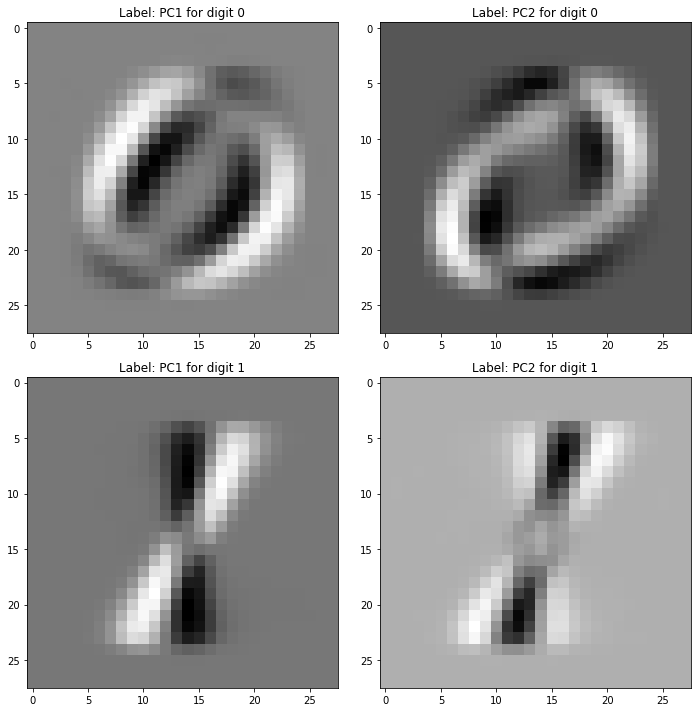

In [31]:
#Plot the PCs
num_row = 2 #to digits
num_col = 2 #two leading principle components
# plot images
labels = ["PC1", "PC2"]
fig, axes = plt.subplots(num_row, num_col, figsize=(10,10))
for digit in range(num_row):
    pca = PCA(n_components=2)
    pca.fit(my_dataset[digit])
    for p in range(num_col):
        ax = axes[digit, p]
        pc = pca.components_[p]
        pc = pc.reshape(28,28)
        ax.imshow(pc, cmap='gray')
        ax.set_title('Label: {} for digit {}'.format(labels[p], digit))

plt.tight_layout()
plt.show()

Text(0, 0.5, 'PC2')

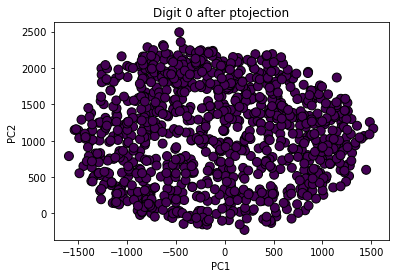

In [65]:
#Project the data onto the new space that the PCs create
pca_0 = PCA(n_components=2)
pca_0.fit(my_dataset[0])
PCs_0 = pca_0.components_
projected_data = PCs_0 @ my_dataset[0].T #shape = [features, num_samples]
plt.scatter(projected_data[0,:],projected_data[1,:], c=y_train_0, marker='o',s=80,edgecolor='k')
plt.title("Digit 0 after ptojection")
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

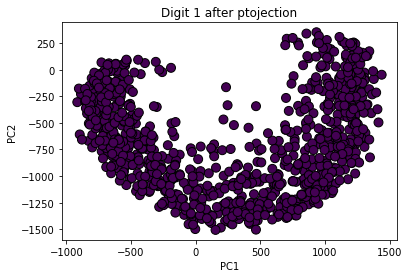

In [66]:
pca_1 = PCA(n_components=2)
pca_1.fit(my_dataset[1])
PCs_1 = pca_1.components_
projected_data = PCs_1 @ my_dataset[1].T #shape = [features, num_samples]
plt.scatter(projected_data[0,:],projected_data[1,:], c=y_train_1, marker='o',s=80,edgecolor='k')
plt.title("Digit 1 after ptojection")
plt.xlabel("PC1")
plt.ylabel("PC2")

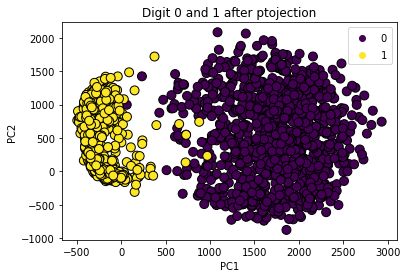

In [75]:
pca = PCA(n_components=2)
pca.fit(my_dataset["0_and_1"])
PCs = pca.components_
projected_data = PCs @ my_dataset["0_and_1"].T #shape = [features, num_samples]
scat = plt.scatter(projected_data[0,:],projected_data[1,:], c=y_combined_dataset, marker='o',s=80,edgecolor='k')
plt.title("Digit 0 and 1 after ptojection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(*scat.legend_elements())


# Section 5

In [56]:
for k,v in my_dataset.items():
    pca = PCA()
    pca.fit(my_dataset[k])
    pc_contribution = np.cumsum(pca.explained_variance_ratio_)
    
    n_90_components = np.argmax(pc_contribution >= 0.9)
    print(f" for saving 90% of the {k} dataset's variance is required to hold {n_90_components} components")

 for saving 90% of the 0 dataset's variance is required to hold 56 components
 for saving 90% of the 1 dataset's variance is required to hold 33 components
 for saving 90% of the 0_and_1 dataset's variance is required to hold 45 components


# Section 6

In [127]:
#load image

images_real = [cv2.imread(file) for file in glob.glob("C:/Users/HP/Desktop/coil-20-proc/coil-20-proc/obj1__*.png")]
images = np.stack(images_real, axis=0).reshape(-1, images_real[0].size)
print(images.shape)
#image = imageio.imread("C:/Users/HP/Desktop/coil-20-proc/coil-20-proc/obj1__0.png")

(72, 49152)


In [128]:
len(images)

72

In [129]:
d_in=distance_matrix(images,images)
sigma=1 * np.sort(d_in**2,axis=1)[:,1].max() #this is the Max-Min approach for finding the appropriate sigma.
print(sigma)
k=np.exp(-d_in**2/sigma)
D_minus=np.diag(np.sum(k,axis=0)**(-1))
P=D_minus @ k
eig_vals,eig_vecs = scipy.sparse.linalg.eigs(P,k=3)



32035668.0


In [130]:
eig_vecs = np.real(eig_vecs[:,np.argsort(-eig_vals)]) #np.argsort sorts from small to large so if we want from lrage to samlll we cam add the minus operator
eig_vals = np.real(eig_vals[np.argsort(-eig_vals)])

Text(0, 0.5, 'EV2')

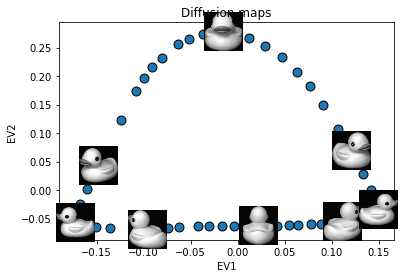

In [135]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
fig, ax = plt.subplots()
ax.scatter(eig_vecs[:, 1],eig_vecs[:, 2], marker='o',s=80,edgecolor='k')
zoom = 0.3
for i in np.arange(0, 72, 10):
    image = images_real[i]
    im = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(im, (eig_vecs[i, 1], eig_vecs[i, 2]), xycoords='data', frameon=False)
    ax.add_artist(ab)
ax.set_title("Diffusion maps")
ax.set_xlabel("EV1")
ax.set_ylabel("EV2")

As we can see the these eigenvectors(EVs) capure the rotation of the image, 360 degree.

A good value for sigma in this case is 32035668.0. as I calculated using the Min-Max approach

# Section 7

In [150]:
#load images
images_real = [cv2.imread(file) for file in glob.glob("C:/Users/HP/Desktop/coil-20-proc/coil-20-proc/obj[1-2]__*.png")] #I tool here object 1 and object 2
images = np.stack(images_real, axis=0).reshape(-1, images_real[0].size)

images_label = [int(os.path.basename(file)[3]) for file in glob.glob("C:/Users/HP/Desktop/coil-20-proc/coil-20-proc/obj[1-2]__*.png")]

print(images.shape)

(144, 49152)


Text(0.5, 1.0, 'T-SNE')

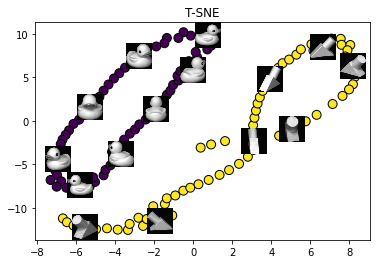

In [156]:
images_embedded = TSNE(n_components=2,init='random').fit_transform(images)
fig, ax = plt.subplots()
ax.scatter(images_embedded[:, 0],images_embedded[:, 1], marker='o',s=80,edgecolor='k',c=images_label)
zoom = 0.2
for i in np.arange(0, 144, 10):
    image = images_real[i]
    im = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(im, (images_embedded[i, 0],images_embedded[i, 1]), xycoords='data', frameon=False)
    ax.add_artist(ab)
ax.set_title("T-SNE")


As we can see, there are two separated groups. In addition, for each group it can be seen that the two component of T-SNE captue the rotation of the image

Text(0.5, 1.0, 'T-SNE')

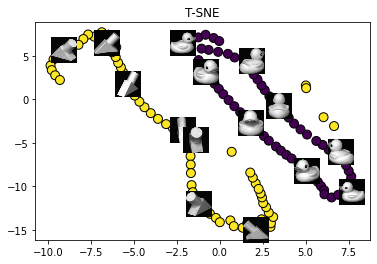

In [159]:
images_embedded = TSNE(n_components=2,init='random').fit_transform(images)
fig, ax = plt.subplots()
ax.scatter(images_embedded[:, 0],images_embedded[:, 1], marker='o',s=80,edgecolor='k',c=images_label)
zoom = 0.2
for i in np.arange(0, 144, 10):
    image = images_real[i]
    im = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(im, (images_embedded[i, 0],images_embedded[i, 1]), xycoords='data', frameon=False)
    ax.add_artist(ab)
ax.set_title("T-SNE")

Of course the results are not same since the T-SNE tries to minimize the  non-convex Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space by gradient descent, i.e. multiple restarts with different initializations will end up in local minima of the KL divergence.

# Section 10

Text(0.5, 1.0, 'UMAP')

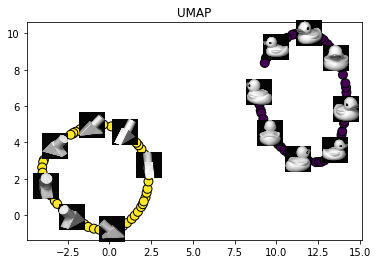

In [167]:
ump = umap.UMAP(n_neighbors=5)

images_embedded = ump.fit_transform(images)
fig, ax = plt.subplots()
ax.scatter(images_embedded[:, 0],images_embedded[:, 1], marker='o',s=80,edgecolor='k',c=images_label)
zoom = 0.2
for i in np.arange(0, 144, 10):
    image = images_real[i]
    im = OffsetImage(image, zoom=zoom)
    ab = AnnotationBbox(im, (images_embedded[i, 0],images_embedded[i, 1]), xycoords='data', frameon=False)
    ax.add_artist(ab)
ax.set_title("UMAP")

As we can see the results are better with the UMAP algorithm. The separation is better than the T-SNE. In addition, the rotation of the images is well separated too, i.e we get circle with lrager radius opposite to the T-SNE that te results don't get closer to circle. Another advantage over the T-SNE is the run time, the run time is lower than the T-SNE.